In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


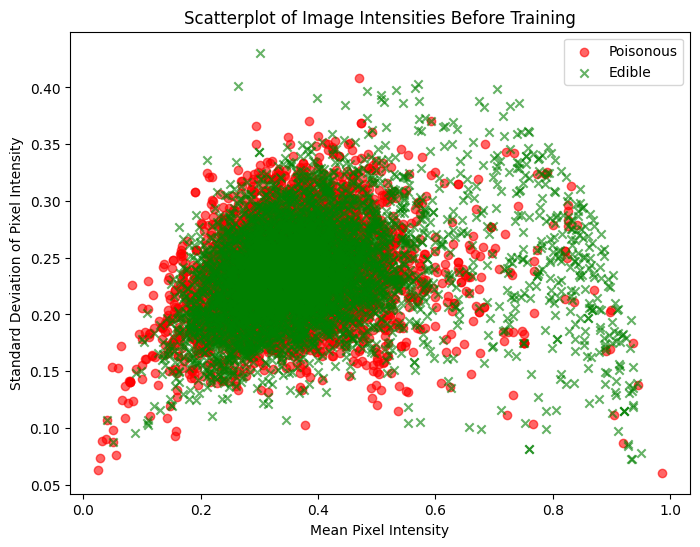

Class Weights: {0: 1.8913711826193893, 1: 2.1218670958841113}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


289/289 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.5162 - loss: 1.8361 - val_accuracy: 0.5043 - val_loss: 0.7346
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - accuracy: 0.5499 - loss: 1.4879 - val_accuracy: 0.6057 - val_loss: 0.6608
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.5635 - loss: 1.4179 - val_accuracy: 0.6326 - val_loss: 0.6450
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.5822 - loss: 1.3631 - val_accuracy: 0.5867 - val_loss: 0.6676
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5923 - loss: 1.3376 - val_accuracy: 0.6404 - val_loss: 0.6391
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.6083 - loss: 1.3249 - val_accuracy: 0.6434 - val_loss: 0.6338
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6135 - loss: 1.3050 - val_accuracy: 0.5836 - val_loss: 0.6869
Epoch 8/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.6180 - loss: 1.3002 - val_accurac

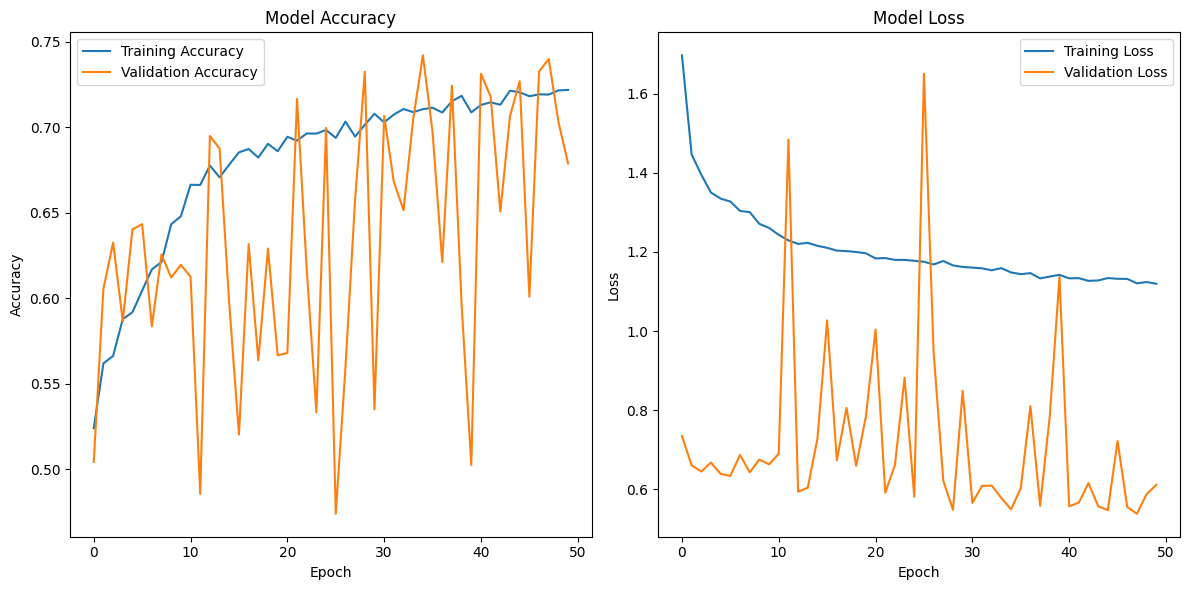

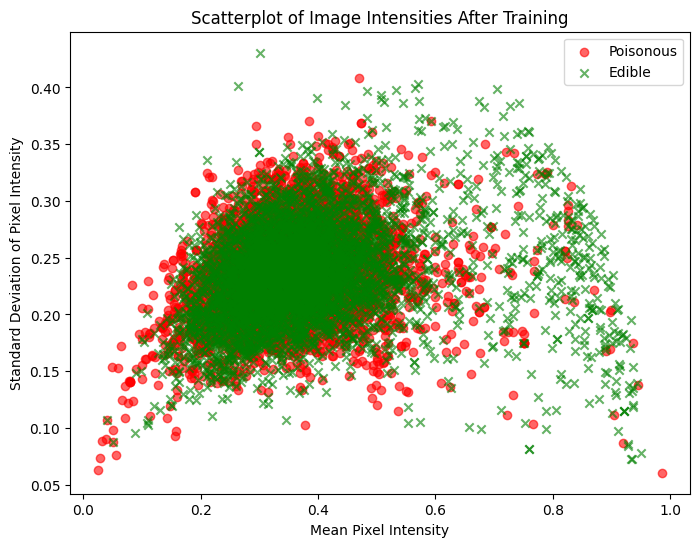

73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


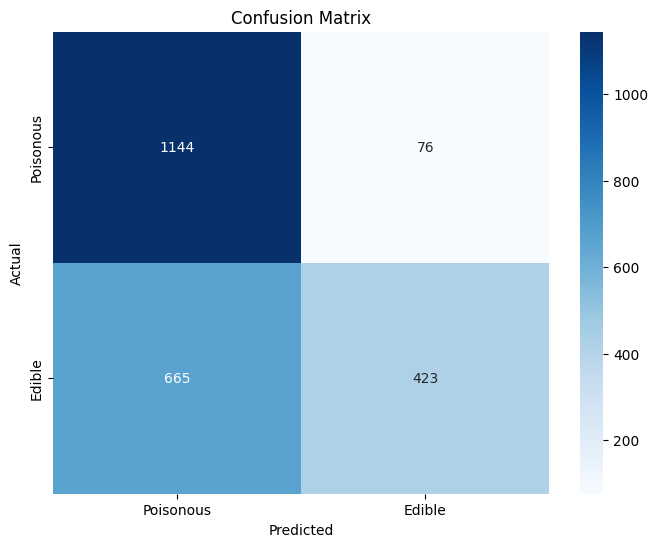


Classification Report:
              precision    recall  f1-score   support

   Poisonous       0.63      0.94      0.76      1220
      Edible       0.85      0.39      0.53      1088

    accuracy                           0.68      2308
   macro avg       0.74      0.66      0.64      2308
weighted avg       0.73      0.68      0.65      2308

Model saved successfully.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from collections import Counter

# Dataset loading function
def load_custom_dataset(base_dir, image_size=(64, 64)):
    dataset = []
    labels = []
    class_mapping = {'poisonous': 0, 'edible': 1}

    for class_name, label in class_mapping.items():
        class_dir = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_dir):
            print(f"Warning: Missing class directory {class_name}")
            continue

        # Iterate through each mushroom directory under 'poisonous' or 'edible'
        for mushroom_dir in os.listdir(class_dir):
            mushroom_path = os.path.join(class_dir, mushroom_dir)

            if os.path.isdir(mushroom_path):
                for filename in os.listdir(mushroom_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        file_path = os.path.join(mushroom_path, filename)
                        try:
                            img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
                            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                            dataset.append(img_array)
                            labels.append(label)
                        except Exception as e:
                            print(f"Loading error: {file_path}, Error: {e}")

    if not dataset:
        raise ValueError("Dataset is empty. Check the directory structure or file paths.")
    return np.array(dataset), np.array(labels)

# Function to visualize data with a scatterplot before training
def plot_scatter(dataset, labels):
    mean_intensities = [np.mean(img) for img in dataset]
    std_intensities = [np.std(img) for img in dataset]

    plt.figure(figsize=(8, 6))
    for label, color, marker in zip([0, 1], ['red', 'green'], ['o', 'x']):
        indices = (labels == label)
        plt.scatter(
            np.array(mean_intensities)[indices],
            np.array(std_intensities)[indices],
            label='Poisonous' if label == 0 else 'Edible',
            alpha=0.6, c=color, marker=marker
        )

    plt.title('Scatterplot of Image Intensities Before Training')
    plt.xlabel('Mean Pixel Intensity')
    plt.ylabel('Standard Deviation of Pixel Intensity')
    plt.legend()
    plt.show()

# Function to visualize data with a scatterplot after training
def plot_scatter_after_training(dataset, labels):
    mean_intensities = [np.mean(img) for img in dataset]
    std_intensities = [np.std(img) for img in dataset]

    plt.figure(figsize=(8, 6))
    for label, color, marker in zip([0, 1], ['red', 'green'], ['o', 'x']):
        indices = (labels == label)
        plt.scatter(
            np.array(mean_intensities)[indices],
            np.array(std_intensities)[indices],
            label='Poisonous' if label == 0 else 'Edible',
            alpha=0.6, c=color, marker=marker
        )

    plt.title('Scatterplot of Image Intensities After Training')
    plt.xlabel('Mean Pixel Intensity')
    plt.ylabel('Standard Deviation of Pixel Intensity')
    plt.legend()
    plt.show()

# Model creation function
def create_model(input_shape=(64, 64, 3)):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Function for plotting metrics
def plot_metrics(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function for evaluation and confusion matrix
def evaluate_model(model, val_dataset, val_labels, threshold=0.5):
    y_pred = model.predict(val_dataset)
    y_pred_classes = (y_pred > threshold).astype(int)

    cm = confusion_matrix(val_labels, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Poisonous', 'Edible'],
                yticklabels=['Poisonous', 'Edible'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\nClassification Report:")
    print(classification_report(val_labels, y_pred_classes, target_names=['Poisonous', 'Edible']))

# Main function
def main():
    base_dir = '/content/drive/My Drive/mushroom_dataset'
    dataset, labels = load_custom_dataset(base_dir)

    # Scatterplot before training
    plot_scatter(dataset, labels)

    train_dataset, val_dataset, train_labels, val_labels = train_test_split(
        dataset, labels, test_size=0.2, stratify=labels, random_state=42
    )

    class_counts = Counter(train_labels)
    class_weights = {0: len(train_labels) / class_counts[0],
                     1: len(train_labels) / class_counts[1]}
    print("Class Weights:", class_weights)

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    model = create_model()

   history = model.fit(
        datagen.flow(train_dataset, train_labels, batch_size=32),
        validation_data=(val_dataset, val_labels),
        epochs=50,
        class_weight=class_weights
    )

    plot_metrics(history)

    # Scatterplot after training
    plot_scatter_after_training(dataset, labels)

    evaluate_model(model, val_dataset, val_labels)
    model.save('/content/drive/My Drive/mushroom_classifier.h5')
    print("Model saved successfully.")

if __name__ == "__main__":
    main()


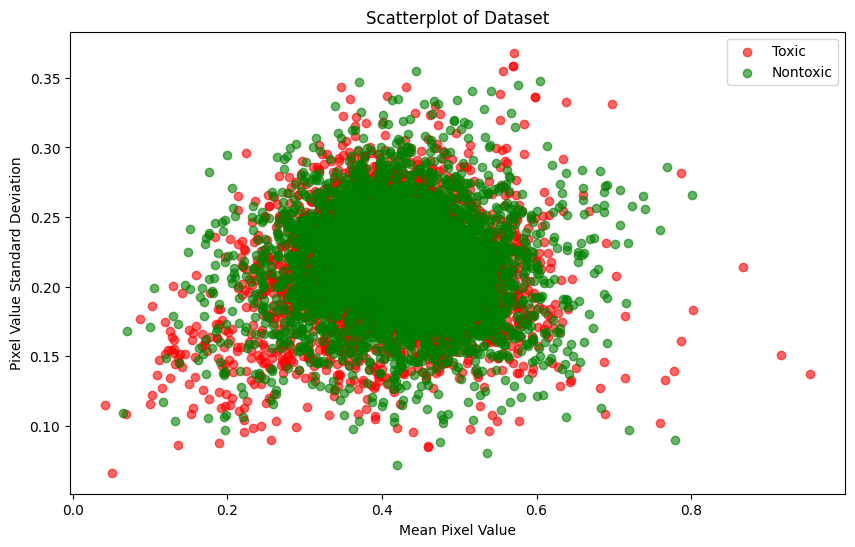

Training set class distribution:
Toxic: 3983, Nontoxic: 3999

Validation set class distribution:
Toxic: 996, Nontoxic: 1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.5135 - loss: 0.9010 - val_accuracy: 0.5115 - val_loss: 0.7013 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.5267 - loss: 0.7561 - val_accuracy: 0.5080 - val_loss: 0.7061 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5489 - loss: 0.7101 - val_accuracy: 0.5205 - val_loss: 0.7177 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.5595 - loss: 0.6914 - val_accuracy: 0.5516 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.5706 - loss: 0.6816 - val_accuracy: 0.5511 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.5705 - loss: 0.6782 - val_accuracy: 0.5531 - val_loss: 0.6813 - learning_rate: 0.0010
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.5645 - loss: 0.6746

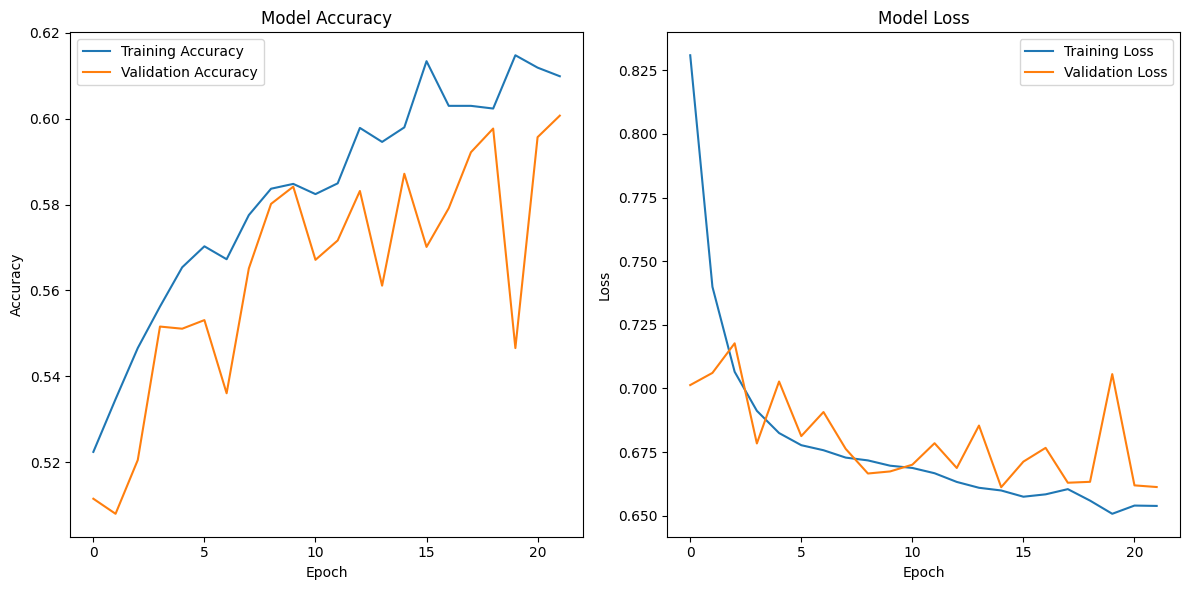

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


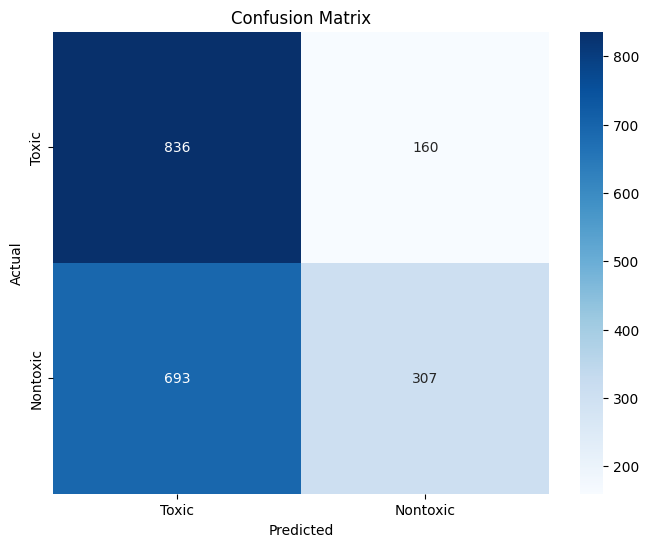


Classification Report:
              precision    recall  f1-score   support

       Toxic       0.55      0.84      0.66       996
    Nontoxic       0.66      0.31      0.42      1000

    accuracy                           0.57      1996
   macro avg       0.60      0.57      0.54      1996
weighted avg       0.60      0.57      0.54      1996

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


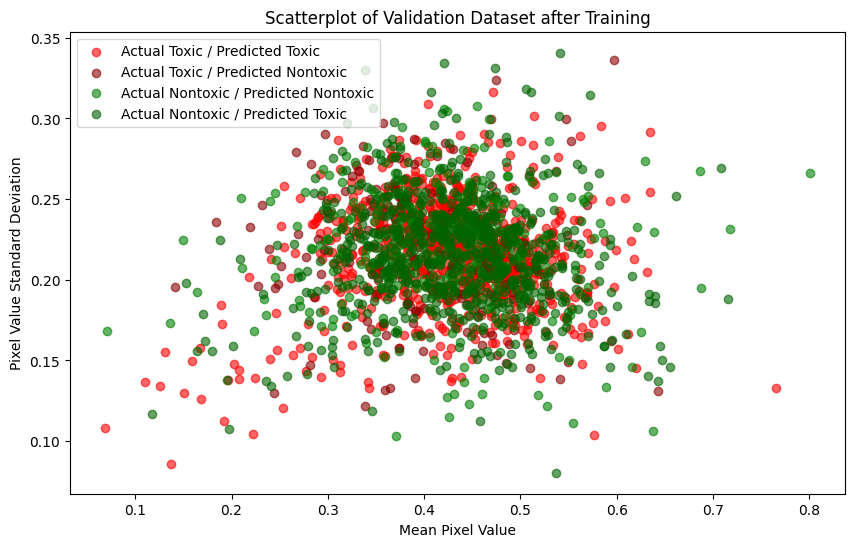

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,923,397 (14.97 MB)

 Trainable params: 1,307,393 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 2,614,788 (9.97 MB)

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from collections import Counter

def load_custom_dataset(base_dir, image_size=(64, 64)):
    dataset = []
    labels = []
    class_mapping = {'toxic_images': 0, 'nontoxic_images': 1}

    for class_name, label in class_mapping.items():
        class_dir = os.path.join(base_dir, class_name)
        for subdir in os.listdir(class_dir):
            subdir_path = os.path.join(class_dir, subdir)
            if os.path.isdir(subdir_path):
                for filename in os.listdir(subdir_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        file_path = os.path.join(subdir_path, filename)
                        try:
                            img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
                            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                            dataset.append(img_array)
                            labels.append(label)
                        except Exception as e:
                            print(f"Loading error: {file_path}, Error: {e}")

    return np.array(dataset), np.array(labels)

def print_class_distribution(train_labels, val_labels):
    train_class_counts = Counter(train_labels)
    val_class_counts = Counter(val_labels)

    print("Training set class distribution:")
    print(f"Toxic: {train_class_counts[0]}, Nontoxic: {train_class_counts[1]}")
    print("\nValidation set class distribution:")
    print(f"Toxic: {val_class_counts[0]}, Nontoxic: {val_class_counts[1]}")

def create_model(input_shape=(64, 64, 3)):
    model = tf.keras.Sequential([
        # Convolutional layers
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),

        # Dense layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Model compilation
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def plot_performance_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, val_dataset, val_labels):
    y_pred = model.predict(val_dataset)
    y_pred_classes = (y_pred > 0.5).astype(int)

    cm = confusion_matrix(val_labels, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Toxic', 'Nontoxic'],
        yticklabels=['Toxic', 'Nontoxic']
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(
        val_labels,
        y_pred_classes,
        target_names=['Toxic', 'Nontoxic']
    ))

def plot_scatter(dataset, labels):

    # Calculate mean pixel values for 2D visualization
    x_coords = dataset.mean(axis=(1, 2, 3))
    y_coords = dataset.std(axis=(1, 2, 3))

    # Separate data points by class
    toxic_points = labels == 0
    nontoxic_points = labels == 1

    # Create scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_coords[toxic_points], y_coords[toxic_points], label='Toxic', alpha=0.6, c='red')
    plt.scatter(x_coords[nontoxic_points], y_coords[nontoxic_points], label='Nontoxic', alpha=0.6, c='green')

    plt.title('Scatterplot of Dataset')
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Pixel Value Standard Deviation')
    plt.legend()
    plt.show()

def plot_scatter_after_training(model, val_dataset, val_labels):
    # Get model predictions
    y_pred = model.predict(val_dataset)
    y_pred_classes = (y_pred.flatten() > 0.5).astype(int)  # Ensure 1D array

    # Calculate mean and standard deviation of pixel values for each image
    x_coords = val_dataset.mean(axis=(1, 2, 3))  # Mean of each image's pixel values
    y_coords = val_dataset.std(axis=(1, 2, 3))   # Standard deviation of pixel values

    # Convert labels and predictions to boolean arrays
    toxic_points = val_labels == 0
    nontoxic_points = val_labels == 1
    predicted_toxic_points = y_pred_classes == 0
    predicted_nontoxic_points = y_pred_classes == 1

    # Create scatter plot
    plt.figure(figsize=(10, 6))

    # Actual toxic vs predicted toxic
    plt.scatter(x_coords[toxic_points & (predicted_toxic_points)], y_coords[toxic_points & (predicted_toxic_points)],
                label='Actual Toxic / Predicted Toxic', alpha=0.6, c='red')
    plt.scatter(x_coords[toxic_points & (~predicted_toxic_points)], y_coords[toxic_points & (~predicted_toxic_points)],
                label='Actual Toxic / Predicted Nontoxic', alpha=0.6, c='darkred')

    # Actual nontoxic vs predicted nontoxic
    plt.scatter(x_coords[nontoxic_points & (predicted_nontoxic_points)], y_coords[nontoxic_points & (predicted_nontoxic_points)],
                label='Actual Nontoxic / Predicted Nontoxic', alpha=0.6, c='green')
    plt.scatter(x_coords[nontoxic_points & (~predicted_nontoxic_points)], y_coords[nontoxic_points & (~predicted_nontoxic_points)],
                label='Actual Nontoxic / Predicted Toxic', alpha=0.6, c='darkgreen')

    plt.title('Scatterplot of Validation Dataset after Training')
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Pixel Value Standard Deviation')
    plt.legend()
    plt.show()


def main():
    # Dataset directory
    base_dir = '/content/drive/My Drive/plant'

    # Load dataset
    dataset, labels = load_custom_dataset(base_dir)

    # Plot scatterplot of raw data
    plot_scatter(dataset, labels)

    # Split data into train and validation sets
    train_dataset, val_dataset, train_labels, val_labels = train_test_split(
        dataset, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Print class distribution
    print_class_distribution(train_labels, val_labels)

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Create model
    model = create_model()

    # Callbacks
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-5
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=7,
        restore_best_weights=True
    )

    # Train model
    history = model.fit(
        datagen.flow(train_dataset, train_labels, batch_size=32),
        validation_data=datagen.flow(val_dataset, val_labels, batch_size=32),
        epochs=50,
        callbacks=[lr_scheduler, early_stopping]
    )

    # Plot performance metrics
    plot_performance_metrics(history)

    # Plot confusion matrix and print classification report
    plot_confusion_matrix(model, val_dataset, val_labels)

    # Plot scatter after training
    plot_scatter_after_training(model, val_dataset, val_labels)

    # Save model
    model.save('/content/drive/My Drive/plant_classifier.h5')

    # Optional: Print model summary
    model.summary()

    return model

def evaluate_model(model, val_dataset, val_labels):
    # Evaluate model
    evaluation = model.evaluate(val_dataset, val_labels)

    # Create metrics dictionary
    metrics = {
        'loss': evaluation[0],
        'accuracy': evaluation[1]
    }

    print("\nModel Evaluation Metrics:")
    print(f"Loss: {metrics['loss']:.4f}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")

    return metrics

def predict_plant(model, image_path, image_size=(64, 64)):
    try:
        # Load and preprocess image
        img = tf.keras.preprocessing.image.load_img(
            image_path,
            target_size=image_size
        )
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Make prediction
        prediction = model.predict(img_array)[0][0]

        # Convert prediction to class label
        result = 'Nontoxic' if prediction > 0.5 else 'Toxic'
        confidence = prediction if prediction > 0.5 else 1 - prediction

        print(f"\nPrediction for {image_path}:")
        print(f"Class: {result}")
        print(f"Confidence: {confidence * 100:.2f}%")

        return result

    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Optional: Add data preprocessing utilities
def preprocess_images(images, target_size=(64, 64)):
    processed_images = []
    for img in images:
        img_resized = tf.image.resize(img, target_size)
        processed_images.append(img_resized)

    return np.array(processed_images) / 255.0

# Script execution
if __name__ == "__main__":
    # Run main function
    trained_model = main()


In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
!pip install gradio_webrtc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 23.8 MB/s eta 0:00:00


In [3]:
!pip install --upgrade gradio


In [5]:
pip install silero

In [4]:

    outputs="text",
    title="Mushroom and Plant Classifier",
    description="Upload or capture an image and select a classifier to determine if it's a mushroom or a plant."
)
from tensorflow.keras.models import load_model
import numpy as np
import gradio as gr
from gradio_webrtc import WebRTC
from PIL import Image

# Load both models
mushroom_model = load_model('/content/drive/My Drive/mushroom_classifier.h5')
plant_model = load_model('/content/drive/My Drive/plant_classifier.h5')

# Prediction function for Mushroom Classifier
def predict_mushroom(image):
    img = image.resize((64, 64))  # Assuming mushroom model expects 64x64 input images
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    result = mushroom_model.predict(img_array)
    prediction = 'edible' if result[0][0] > 0.5 else 'poisonous'
    confidence = result[0][0] if result[0][0] > 0.5 else 1 - result[0][0]

    return f"Mushroom is {prediction} with {confidence*100:.2f}% confidence."

# Prediction function for Plant Classifier
def predict_plant(image):
    img = image.resize((64, 64))  # Assuming plant model expects 64x64 input images
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    result = plant_model.predict(img_array)
    prediction = 'non-toxic' if result[0][0] > 0.5 else 'toxic'
    confidence = result[0][0] if result[0][0] > 0.5 else 1 - result[0][0]

    return f"Plant is {prediction} with {confidence*100:.2f}% confidence."

# Combined Gradio interface function
def predict(image, classifier):
    if classifier == "Mushroom Classifier":
        return predict_mushroom(image)
    elif classifier == "Plant Classifier":
        return predict_plant(image)
    else:
        return "Invalid classifier selected."

# Gradio interface with a dropdown for classifier selection and WebRTC camera option
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Image(type="pil", label="Upload or Use Camera"),  # Image input (can upload or use camera)
        gr.Dropdown(choices=["Mushroom Classifier", "Plant Classifier"], label="Select Classifier")  # Dropdown for classifier
    ],
# Launch Gradio interface
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e03bef3e26db1fd89b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
